# main

In [38]:
import re
import pandas as pd

def get_res(filename, interval):
    pattern = r"thresh (\d+\.\d+) \| est fdr (\d+\.\d+) \| true fdr (\d+\.\d+) \| true power (\d+\.\d+)"
    
    logs = []
    with open(filename, 'r') as file:
        lines = file.readlines()
        for line in lines[interval[0]:interval[1]]:  # choose the first line - 1 : the last line
            match = re.search(pattern, line)
            if match:
                logs.append(match.groups())
    df = pd.DataFrame(logs, columns=["thresh", "est fdr", "true fdr", "true power"])
    return df

In [65]:
df = {}
idx = 30
filename = f"/Users/jiahang/Documents/dagma/src/dagma/notebooks/log_{idx}.txt"
df[idx] = get_res(filename, interval = [2837, 5672])

idx = 53
filename = f"/Users/jiahang/Documents/dagma/src/dagma/notebooks/log_{idx}.txt"
df[idx] = get_res(filename, interval = [2865, 5691])

idx = 54
filename = f"/Users/jiahang/Documents/dagma/src/dagma/notebooks/log_{idx}.txt"
df[idx] = get_res(filename, interval = [2805, 5632])

idx = 55
filename = f"/Users/jiahang/Documents/dagma/src/dagma/notebooks/log_{idx}.txt"
df[idx] = get_res(filename, interval = [2681, 5471])

idx = 56
filename = f"/Users/jiahang/Documents/dagma/src/dagma/notebooks/log_{idx}.txt"
df[idx] = get_res(filename, interval = [2799, 5611])

idx = 57
filename = f"/Users/jiahang/Documents/dagma/src/dagma/notebooks/log_{idx}.txt"
df[idx] = get_res(filename, interval = [2865, 5720])

idx = 58
filename = f"/Users/jiahang/Documents/dagma/src/dagma/notebooks/log_{idx}.txt"
df[idx] = get_res(filename, interval = [2859, 5682])


In [67]:
labels = {
    30: "no deconv",
    53: "W = W+aW^2, a=1",
    55: "W = W+aW^2, a=0.7",
    56: "W = W+aW^2, a=0.3",
    54: "|W| = W+aW^2, a=1",
    57: "|W| = W+aW^2, a=0.7",
    58: "|W| = W+aW^2, a=0.3",
}

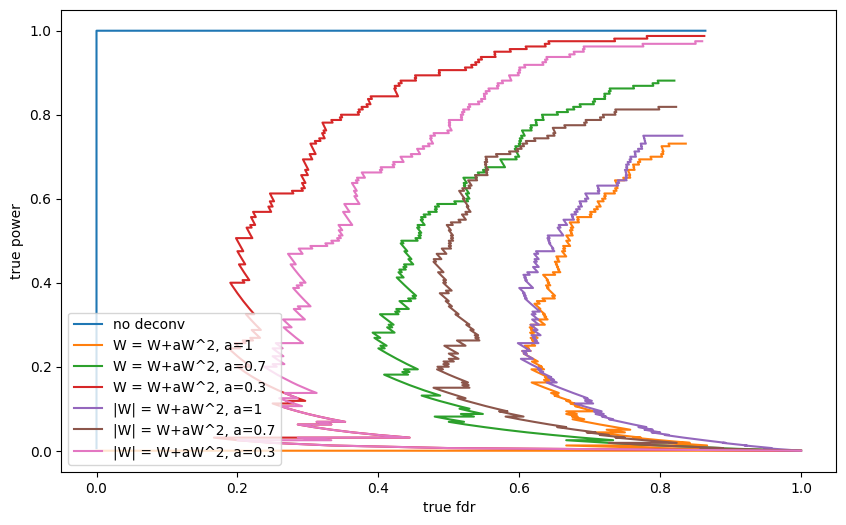

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for key, val in labels.items():
    plt.plot(df[key]['true fdr'].values.astype(float), df[key]['true power'].values.astype(float), label=val)
plt.xlabel("true fdr")
plt.ylabel("true power")
plt.legend()
plt.show()

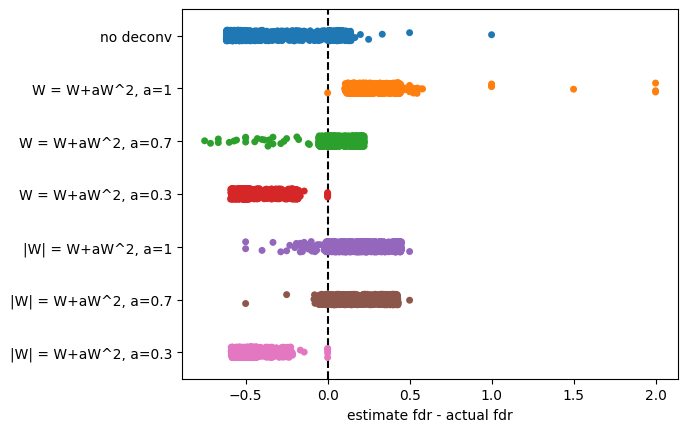

In [72]:
import seaborn as sns
ax = sns.stripplot(
    [
        df[key]['est fdr'].values.astype(float) - df[key]['true fdr'].values.astype(float) \
        for key in labels.keys()
    ], orient='h')

ax.set_yticks(list(range(len(labels))), list(labels.values()))
ax.set_xlabel("estimate fdr - actual fdr")
plt.axvline(x=0, color='black', ls='--')
plt.show()

# check statistics distributions after dag_1 control

In [73]:
import pickle, os
import numpy as np
from numpy.linalg import matrix_power

root_path = '/Users/jiahang/Documents/dagma/src/dagma/'

import sys
sys.path.append('/Users/jiahang/Documents/dagma/src/dagma/')

import deconv
from importlib import reload
reload(deconv)

import matplotlib.pyplot as plt
import utils_dagma
import utils
import scipy
import seaborn as sns

In [75]:
with open(os.path.join(root_path, 'simulated_data/v11/v40/W/W_2_0.pkl'), 'rb') as f:
    W_2_0_40 = pickle.load(f)
with open(os.path.join(root_path, 'simulated_data/v11/v40/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
n_nodes = 40
W_40 = W_2_0_40['W_est'][:, :n_nodes]
W_true_40 = X['W_true']
B_true_40 = (W_true_40 != 0)
W_est_40 = W_2_0_40['W_est']

In [80]:
Z = np.abs(W_40[:n_nodes]) - np.abs(W_40[n_nodes:])
Z_min = Z.min()
mask = utils.extract_dag_mask(Z, 0)
Z_dag_1 = Z.copy()
Z_dag_1[~mask] = Z_min

Text(0, 0.5, 'Z0')

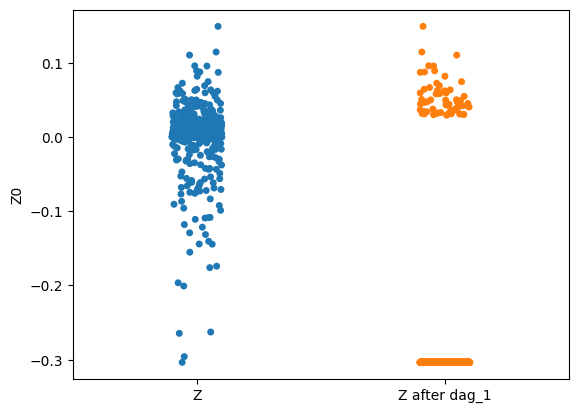

In [96]:
ax = sns.stripplot([Z[~B_true_40], Z_dag_1[~B_true_40]])
ax.set_xticks([0, 1], ["Z", "Z after dag_1"])
ax.set_ylabel("Z0")

In [95]:
print(f"Z > 0.: {(Z > 0.).sum() / (Z.shape[0] * Z.shape[1]) * 100}%")
print(f"Z after dag_1 > 0: {(Z_dag_1 > 0.).sum() / (Z.shape[0] * Z.shape[1]) * 100}%")

Z > 0.: 71.125%
Z after dag_1 > 0: 14.0625%


14.0625